## IP Assignment 2
#### Venkata Hem -- 2020503007

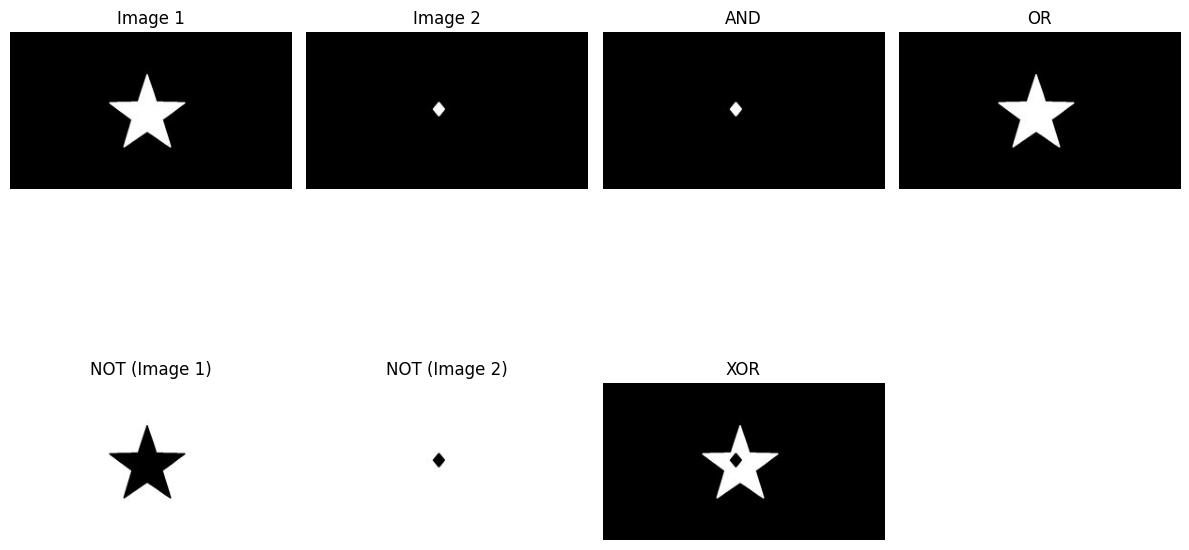

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
import cv2
from io import BytesIO

url1 = 'https://media.geeksforgeeks.org/wp-content/uploads/star-1-300x168.jpg'
url2 = 'https://media.geeksforgeeks.org/wp-content/uploads/dot-300x168.jpg'
def load_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return np.array(img)
image1 = load_image(url1)
image2 = load_image(url2)
result_and = cv2.bitwise_and(image1, image2)
result_or = cv2.bitwise_or(image1, image2)
result_not = cv2.bitwise_not(image1)
result_not2 = cv2.bitwise_not(image2)
result_xor = cv2.bitwise_xor(image1, image2)

complement = cv2.bitwise_not(image1)
plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(result_and, cv2.COLOR_BGR2RGB))
plt.title('AND')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(cv2.cvtColor(result_or, cv2.COLOR_BGR2RGB))
plt.title('OR')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(result_not, cv2.COLOR_BGR2RGB))
plt.title('NOT (Image 1)')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(cv2.cvtColor(result_not2, cv2.COLOR_BGR2RGB))
plt.title('NOT (Image 2)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(cv2.cvtColor(result_xor, cv2.COLOR_BGR2RGB))
plt.title('XOR')
plt.axis('off')

plt.tight_layout()
plt.show()

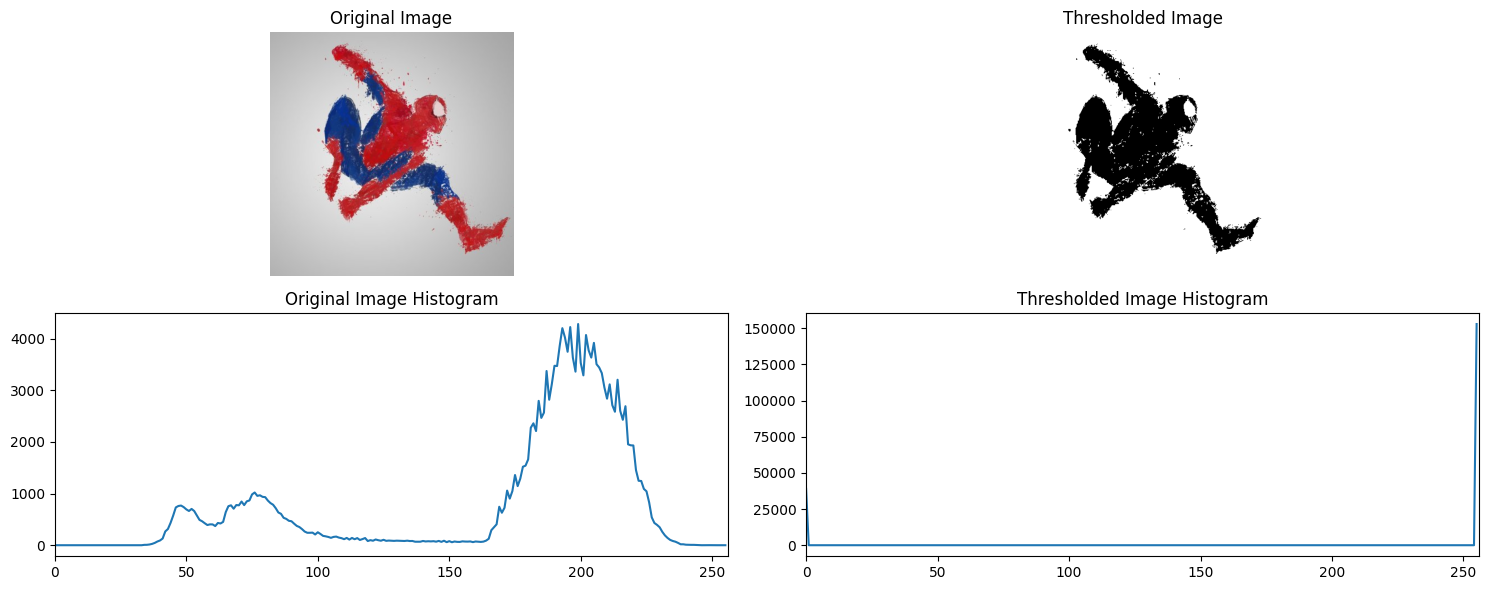

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

url = "https://mypage114041763.files.wordpress.com/2023/10/674430.jpg?resize=438%2C438"

def load_image(url):
    response = requests.get(url)
    img = cv2.imdecode(np.frombuffer(response.content, np.uint8), -1)
    return img

image = load_image(url)

if len(image.shape) == 3:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray_image = image

_, thresholded_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
hist_original = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_thresholded = cv2.calcHist([thresholded_image], [0], None, [256], [0, 256])
plt.figure(figsize=(15, 6))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Thresholded Image')
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Original Image Histogram')
plt.plot(hist_original)
plt.xlim([0, 256])

plt.subplot(2, 2, 4)
plt.title('Thresholded Image Histogram')
plt.plot(hist_thresholded)
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

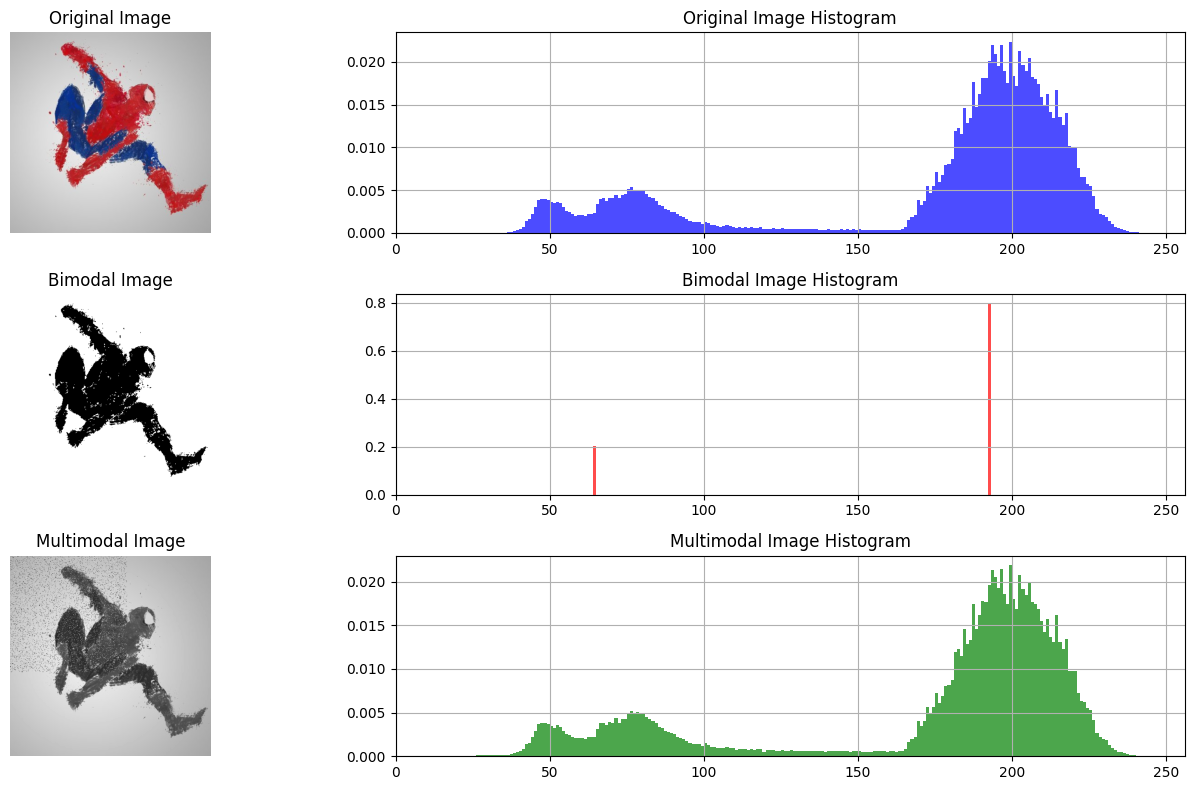

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

url = "https://mypage114041763.files.wordpress.com/2023/10/674430.jpg?resize=438%2C438"

def load_image(url):
    response = requests.get(url)
    img = cv2.imdecode(np.frombuffer(response.content, np.uint8), -1)
    return img

image = load_image(url)

if len(image.shape) == 3:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray_image = image

plt.figure(figsize=(15, 8))

plt.subplot(3, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Original Image Histogram')
plt.hist(gray_image.ravel(), bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
plt.xlim(0, 256)
plt.grid()

bimodal_image = gray_image.copy()
bimodal_image[bimodal_image < 128] = 64
bimodal_image[bimodal_image >= 128] = 192

plt.subplot(3, 2, 3)
plt.title('Bimodal Image')
plt.imshow(bimodal_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('Bimodal Image Histogram')
plt.hist(bimodal_image.ravel(), bins=256, range=(0, 256), density=True, color='red', alpha=0.7)
plt.xlim(0, 256)
plt.grid()

multimodal_image = gray_image.copy()
peaks = [50, 100, 150, 200]

for peak in peaks:
    values = np.random.normal(peak, 20, 2000).astype(int)
    for value in values:
        multimodal_image[np.random.randint(0, 255)][np.random.randint(0, 255)] = value

plt.subplot(3, 2, 5)
plt.title('Multimodal Image')
plt.imshow(multimodal_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title('Multimodal Image Histogram')
plt.hist(multimodal_image.ravel(), bins=256, range=(0, 256), density=True, color='green', alpha=0.7)
plt.xlim(0, 256)
plt.grid()

plt.tight_layout()
plt.show()


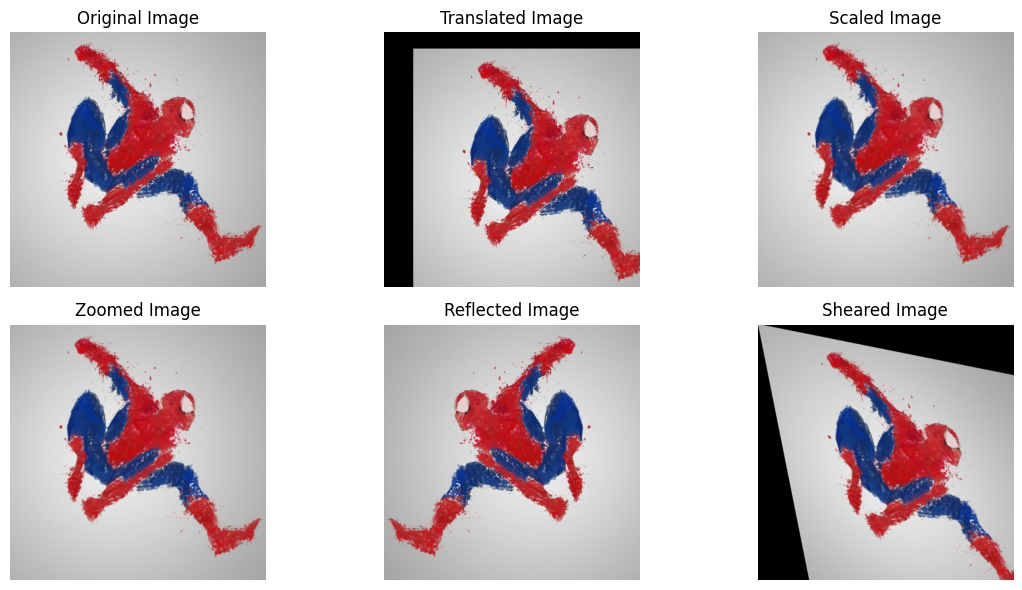

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import requests
from io import BytesIO
url = "https://mypage114041763.files.wordpress.com/2023/10/674430.jpg?resize=438%2C438"
def load_image(url):
    response = requests.get(url)
    img = cv2.imdecode(np.frombuffer(response.content, np.uint8), -1)
    return img
image = load_image(url)
tx = 50
ty = 30
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
scale_factor = 2.0
scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)
zoom_factor = 1.5
zoomed_image = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor)
reflected_image = cv2.flip(image, 1)
shear_matrix = np.float32([[1, 0.2, 0], [0.2, 1, 0]])
sheared_image = cv2.warpAffine(image, shear_matrix, (image.shape[1], image.shape[0]))

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

translated = cv2.warpAffine(image, translation_matrix, (image.shape[1], image.shape[0]))
plt.subplot(2, 3, 2)
plt.title('Translated Image')
plt.imshow(cv2.cvtColor(translated, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Scaled Image')
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Zoomed Image')
plt.imshow(cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Reflected Image')
plt.imshow(cv2.cvtColor(reflected_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Sheared Image')
plt.imshow(cv2.cvtColor(sheared_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


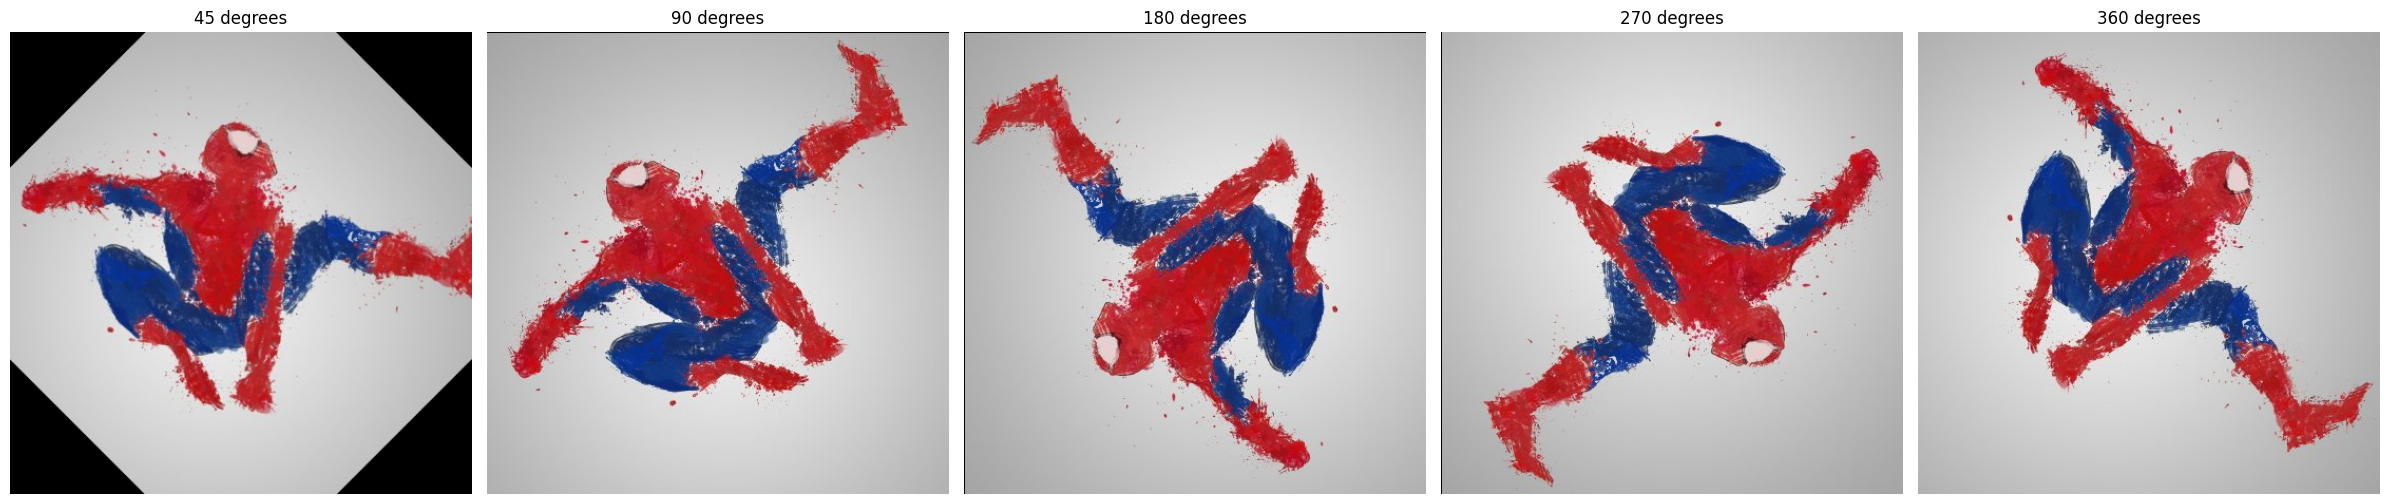

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

url = "https://mypage114041763.files.wordpress.com/2023/10/674430.jpg?resize=438%2C438"
def load_image(url):
    response = requests.get(url)
    img = cv2.imdecode(np.frombuffer(response.content, np.uint8), -1)
    return img
image = load_image(url)
rotation_angles = [45, 90, 180, 270, 360]

plt.figure(figsize=(24, 12))

for i, angle in enumerate(rotation_angles):
    if angle == 360:
        rotated_image = image.copy()
    else:
        rows, cols = image.shape[:2]
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        rotated_image = cv2.warpAffine(image, M, (cols, rows))
    plt.subplot(1, len(rotation_angles), i + 1)
    plt.title(f'{angle} degrees')
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

plt.tight_layout()
plt.show()




In [ ]:
import numpy as np

image1 = np.array([[1, 3, 7],
                   [5, 15, 75],
                   [200, 50, 150]], dtype=np.uint8)

image2 = np.array([[50, 150, 125],
                   [45, 55, 155],
                   [200, 50, 100]], dtype=np.uint8)

addition_result = cv2.add(image1, image2, dtype=cv2.CV_32F)

subtraction_result = cv2.subtract(image1, image2, dtype=cv2.CV_32F)
multiplication_result = cv2.multiply(image1, image2, dtype=cv2.CV_32F)
division_result = cv2.divide(image1.astype(np.float32), image2.astype(np.float32))

print("Image 1:")
print(image1)
print("Image 1:")
print(image1)
print("\nImage 2:")
print(image2)
print("\nAddition Result:")
print(addition_result)
print("\nSubtraction Result:")
print(subtraction_result)
print("\nMultiplication Result:")
print(multiplication_result)
print("\nDivision Result:")
print(division_result)


Image 1:
[[  1   3   7]
 [  5  15  75]
 [200  50 150]]
Image 1:
[[  1   3   7]
 [  5  15  75]
 [200  50 150]]

Image 2:
[[ 50 150 125]
 [ 45  55 155]
 [200  50 100]]

Addition Result:
[[ 51. 153. 132.]
 [ 50.  70. 230.]
 [400. 100. 250.]]

Subtraction Result:
[[ -49. -147. -118.]
 [ -40.  -40.  -80.]
 [   0.    0.   50.]]

Multiplication Result:
[[   50.   450.   875.]
 [  225.   825. 11625.]
 [40000.  2500. 15000.]]

Division Result:
[[0.02       0.02       0.056     ]
 [0.11111111 0.27272728 0.48387095]
 [1.         1.         1.5       ]]


In [ ]:
import numpy as np

A = np.array([[1, 2, 3, 4],
              [5, 5, 6, 6],
              [6, 7, 6, 6],
              [6, 7, 2, 3]], dtype=np.uint8)

B = np.array([[1, 3, 5, 7],
              [8, 7, 0, 1],
              [3, 5, 6, 7],
              [1, 3, 5, 7]], dtype=np.uint8)

addition_result = A + B
subtraction_result = A - B
multiplication_result = A * B

B[B == 0] = 1
division_result = A / B

print("Image A:")
print(A)
print("\nImage B:")
print(B)
print("\nAddition Result:")
print(addition_result)
print("\nSubtraction Result:")
print(subtraction_result)
print("\nMultiplication Result:")
print(multiplication_result)
print("\nDivision Result:")
print(division_result)


Image A:
[[1 2 3 4]
 [5 5 6 6]
 [6 7 6 6]
 [6 7 2 3]]

Image B:
[[1 3 5 7]
 [8 7 1 1]
 [3 5 6 7]
 [1 3 5 7]]

Addition Result:
[[ 2  5  8 11]
 [13 12  6  7]
 [ 9 12 12 13]
 [ 7 10  7 10]]

Subtraction Result:
[[  0 255 254 253]
 [253 254   6   5]
 [  3   2   0 255]
 [  5   4 253 252]]

Multiplication Result:
[[ 1  6 15 28]
 [40 35  0  6]
 [18 35 36 42]
 [ 6 21 10 21]]

Division Result:
[[1.         0.66666667 0.6        0.57142857]
 [0.625      0.71428571 6.         6.        ]
 [2.         1.4        1.         0.85714286]
 [6.         2.33333333 0.4        0.42857143]]


In [ ]:
import numpy as np
image1 = np.array([[1, 0, 0],
                   [1, 1, 1],
                   [0, 0, 1]], dtype=np.uint8)

image2 = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]], dtype=np.uint8)

and_result = cv2.bitwise_and(image1, image2)
or_result = cv2.bitwise_or(image1, image2)
not_result1 = cv2.bitwise_not(image1)
not_result2 = cv2.bitwise_not(image2)
xor_result = cv2.bitwise_xor(image1, image2)
print("Image 1:")
print(image1)

print("\nImage 2:")
print(image2)

print("\nBitwise AND Result:")
print(and_result)

print("\nBitwise OR Result:")
print(or_result)

print("\nBitwise NOT (Invert) Result - Image 1:")
print(not_result1)

print("\nBitwise NOT (Invert) Result - Image 2:")
print(not_result2)

print("\nBitwise XOR (Difference) Result:")
print(xor_result)


Image 1:
[[1 0 0]
 [1 1 1]
 [0 0 1]]

Image 2:
[[1 1 1]
 [1 1 1]
 [1 1 1]]

Bitwise AND Result:
[[1 0 0]
 [1 1 1]
 [0 0 1]]

Bitwise OR Result:
[[1 1 1]
 [1 1 1]
 [1 1 1]]

Bitwise NOT (Invert) Result - Image 1:
[[254 255 255]
 [254 254 254]
 [255 255 254]]

Bitwise NOT (Invert) Result - Image 2:
[[254 254 254]
 [254 254 254]
 [254 254 254]]

Bitwise XOR (Difference) Result:
[[0 1 1]
 [0 0 0]
 [1 1 0]]
